<a href="https://colab.research.google.com/github/anmol0720/Classify-Fashion-Items-Using-Neural-Netwroks/blob/master/Classify_Fashion_Items_Using_Neural_Netwroks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as npl
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [5]:
tf.__version__

'2.2.0-rc3'

In [6]:
keras.__version__

'2.3.0-tf'

In [0]:
fas=keras.datasets.fashion_mnist

In [10]:
(x_train,y_train),(x_test,y_test)=fas.load_data()

4423680/4422102 [==============================] - 0s 0us/step


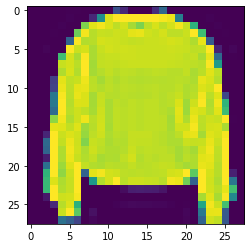

In [17]:
plt.imshow(x_train[7])

In [18]:
y_train[7]

2

In [0]:
class_name=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [22]:
class_name[y_train[7]]

'Pullover'

*These all Categories are Predefined*

In [23]:
x_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

These Represent Pixel Values Row wise